In [13]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [14]:
all_df = pd.read_excel("data/titanic3.xls")

In [15]:
cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [18]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [19]:
print('total:', len(all_df), 'train:', len(train_df), 'test:', len(test_df))

total: 1309 train: 1046 test: 263


In [20]:
def PreprocessData(raw_df):
    df = raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df, columns=["embarked"])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures, Label

In [21]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Dense(units=40, input_dim=9, kernel_initializer='uniform', activation='relu'))

In [25]:
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))

In [26]:
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
train_history = model.fit(x=train_Features, y=train_Label, validation_split=0.1, epochs=30, batch_size=30, verbose=1)

Train on 941 samples, validate on 105 samples
Epoch 1/30
941/941 [==============================] - 1s 830us/step - loss: 0.6903 - acc: 0.5813 - val_loss: 0.6769 - val_acc: 0.7714
Epoch 2/30
941/941 [==============================] - 0s 60us/step - loss: 0.6670 - acc: 0.6387 - val_loss: 0.5986 - val_acc: 0.7714
Epoch 3/30
941/941 [==============================] - 0s 72us/step - loss: 0.6037 - acc: 0.6865 - val_loss: 0.4934 - val_acc: 0.8000
Epoch 4/30
941/941 [==============================] - 0s 56us/step - loss: 0.5321 - acc: 0.7843 - val_loss: 0.4398 - val_acc: 0.8190
Epoch 5/30
941/941 [==============================] - 0s 70us/step - loss: 0.4946 - acc: 0.7790 - val_loss: 0.4212 - val_acc: 0.8190
Epoch 6/30
941/941 [==============================] - 0s 72us/step - loss: 0.4813 - acc: 0.7821 - val_loss: 0.4287 - val_acc: 0.8190
Epoch 7/30
941/941 [==============================] - 0s 75us/step - loss: 0.4751 - acc: 0.7821 - val_loss: 0.4160 - val_acc: 0.8190
Epoch 8/30
941/941 [==

In [29]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

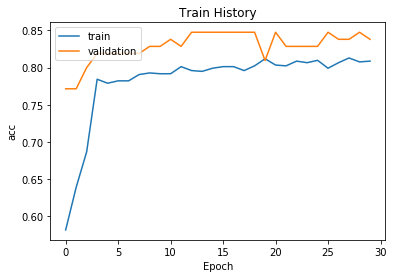

In [30]:
show_train_history(train_history, 'acc', 'val_acc')

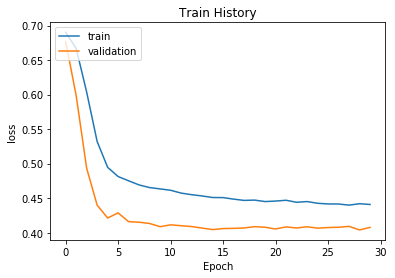

In [31]:
show_train_history(train_history, 'loss', 'val_loss')

In [32]:
scores = model.evaluate(x=test_Features, y=test_Label)

263/263 [==============================] - 0s 75us/step


In [33]:
scores[1]

0.7870722435726413

In [34]:
Jack = pd.Series([0, 'Jack', 3, 'male',   23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'])

In [39]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],columns=['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'])

In [40]:
all_df = pd.concat([all_df, JR_df])

In [41]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [42]:
all_Features,Label = PreprocessData(all_df)

In [43]:
all_probability = model.predict(all_Features)

In [44]:
all_probability[:10]

array([[0.97968745],
       [0.6033674 ],
       [0.9815237 ],
       [0.32942113],
       [0.97284013],
       [0.19140974],
       [0.92554414],
       [0.2451538 ],
       [0.9195065 ],
       [0.18803518]], dtype=float32)

In [45]:
pd=all_df
pd.insert(len(all_df.columns), 'probability', all_probability)

In [46]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.127867
1,1,Rose,1,female,20.0,1,0,100.0,S,0.971495


In [49]:
pd[(pd['survived']==0) & (pd['probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.981524
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.972840
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.975550
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.970111
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.955568


In [50]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.979687
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.603367
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.981524
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.329421
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.972840
